In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [5]:
y = df_train['outcome']

In [6]:
df_train = df_train.drop(['outcome', 'id'], axis=1)
df_full = pd.concat([df_train, df_test.drop('id', axis=1)])

In [7]:
df_full

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,...,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes
820,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,more_3_sec,...,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no
821,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,more_3_sec,...,None,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no
822,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,less_3_sec,...,None,49.0,8.6,clear,5.0,no,3111,0,0,yes


In [8]:
df_train.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes


In [9]:
df_test.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


# Data Analysis #

In [10]:
y

0             died
1       euthanized
2            lived
3            lived
4            lived
           ...    
1230         lived
1231          died
1232         lived
1233         lived
1234         lived
Name: outcome, Length: 1235, dtype: object

<AxesSubplot:xlabel='outcome', ylabel='count'>

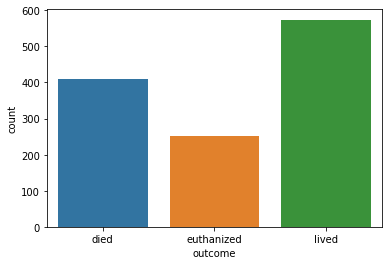

In [11]:
sns.countplot(data=y, x=y.index)

## Data Preprocessing ##

In [12]:
df_full.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')

In [13]:
#This line might be needed depending on the python version yyour running, since the NaN values can appear as 'None' string after reading the data, 
#but they are not detected by the function isnull()
df_full = df_full.replace('None', np.nan)

In [14]:
null_df = pd.Series(df_full.isnull().sum())

Text(0, 0.5, 'Missing values')

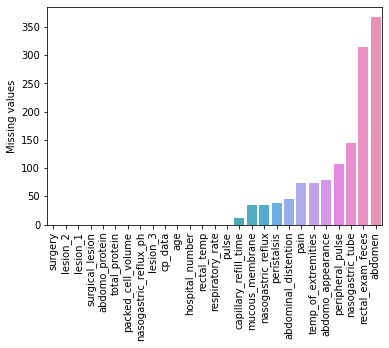

In [15]:
sns.barplot(x=null_df.sort_values().index,y=null_df.sort_values())
plt.xticks(rotation=90);
plt.ylabel('Missing values')

In [16]:
percentage_missing_data = (null_df.sort_values()/df_full.shape[0])*100
percentage_missing_data

surgery                   0.000000
lesion_2                  0.000000
lesion_1                  0.000000
surgical_lesion           0.000000
abdomo_protein            0.000000
total_protein             0.000000
packed_cell_volume        0.000000
nasogastric_reflux_ph     0.000000
lesion_3                  0.000000
cp_data                   0.000000
age                       0.000000
hospital_number           0.000000
rectal_temp               0.000000
respiratory_rate          0.000000
pulse                     0.000000
capillary_refill_time     0.582807
mucous_membrane           1.651287
nasogastric_reflux        1.699854
peristalsis               1.894123
abdominal_distention      2.185527
pain                      3.545410
temp_of_extremities       3.593978
abdomo_appearance         3.836814
peripheral_pulse          5.196697
nasogastric_tube          6.993686
rectal_exam_feces        15.298689
abdomen                  17.824186
dtype: float64

In [17]:
df_full.shape

(2059, 27)

Dropping the columns with more than 10% of missing information. Later on we will drop the rows for those features with less than 1.8% of missing information.

In [18]:
df_full = df_full.drop(['abdomen', 'rectal_exam_feces'], axis=1)

In [19]:
percentage_missing_data = (df_full.isnull().sum().sort_values()/df_full.shape[0])*100

In [20]:
for i in list(percentage_missing_data[percentage_missing_data != 0].index):
    uniques_list = df_full[i].unique()
    print(f'{i} has uniques {uniques_list}' )
    

capillary_refill_time has uniques ['more_3_sec' 'less_3_sec' nan '3']
mucous_membrane has uniques ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red' nan]
nasogastric_reflux has uniques ['less_1_liter' 'more_1_liter' 'none' nan 'slight']
peristalsis has uniques ['absent' 'hypomotile' 'normal' 'hypermotile' nan 'distend_small']
abdominal_distention has uniques ['slight' 'moderate' 'none' 'severe' nan]
pain has uniques ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' nan 'slight'
 'moderate']
temp_of_extremities has uniques ['cool' 'cold' 'normal' 'warm' nan]
abdomo_appearance has uniques ['serosanguious' 'cloudy' 'clear' nan]
peripheral_pulse has uniques ['reduced' 'normal' nan 'absent' 'increased']
nasogastric_tube has uniques ['slight' 'none' 'significant' nan]


In [21]:
corr_df = df_full.copy()

In [22]:
corr_df.capillary_refill_time = corr_df.capillary_refill_time.replace({'more_3_sec':1, 'less_3_sec':-1, '3':0})
corr_df.peristalsis = corr_df.peristalsis.replace({'absent':0, 'hypomotile':-1, 'normal':1, 'hypermotile':2, 'distend_small':0.5})
corr_df.mucous_membrane = corr_df.mucous_membrane.replace({'dark_cyanotic':1, 'pale_cyanotic':2, 'pale_pink':3, 'normal_pink':4, 'bright_pink':5,'bright_red':6})
corr_df.nasogastric_reflux = corr_df.nasogastric_reflux.replace({'less_1_liter':-1, 'more_1_liter':2, 'none':0, 'slight':1})
corr_df.abdominal_distention = corr_df.abdominal_distention.replace({'slight':0.5, 'moderate':1, 'none':0, 'severe':2})
corr_df.temp_of_extremities  = corr_df.temp_of_extremities.replace({'cool':0.5, 'cold':-1, 'normal':1, 'warm':2})
corr_df.pain = corr_df.pain.replace({'depressed':1, 'mild_pain':2, 'extreme_pain':3, 'alert':4, 'severe_pain':5, 'slight':6, 'moderate':7})
corr_df.abdomo_appearance = corr_df.abdomo_appearance.replace({'serosanguious':1, 'cloudy':0.5, 'clear':0})
corr_df.peripheral_pulse = corr_df.peripheral_pulse.replace({'reduced':0.5, 'normal':1,  'absent':0, 'increased':2})
corr_df.nasogastric_tube = corr_df.nasogastric_tube.replace({'slight':1, 'none':0, 'significant':2})

In [23]:
corr_df = corr_df.select_dtypes(include=['float64','int64']).corr()

<AxesSubplot:>

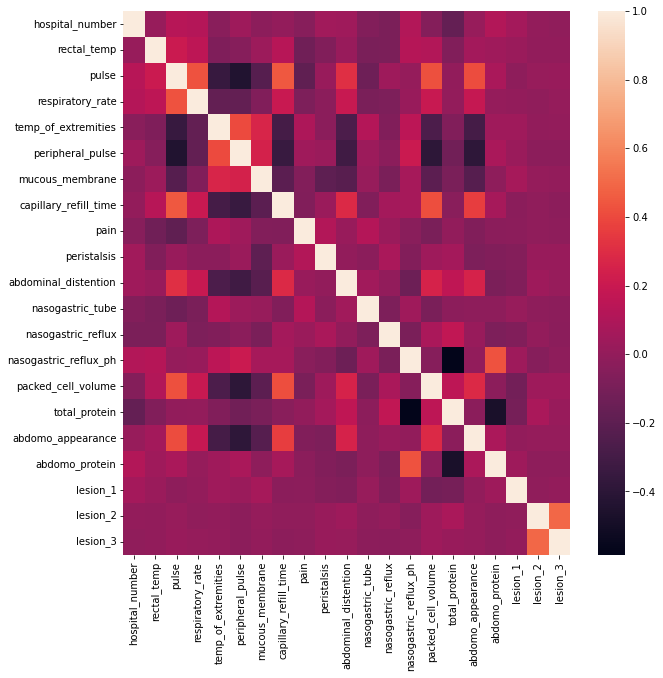

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=False)

In [25]:
corr_df[list(percentage_missing_data[percentage_missing_data != 0].index)]

,capillary_refill_time,mucous_membrane,nasogastric_reflux,peristalsis,abdominal_distention,pain,temp_of_extremities,abdomo_appearance,peripheral_pulse,nasogastric_tube
hospital_number,-0.000230,-0.027050,-0.086509,0.048698,0.042590,-0.045322,-0.036827,0.013373,0.034896,-0.061255
rectal_temp,0.131042,0.034493,-0.085732,-0.068267,0.020160,-0.128663,-0.074017,0.058703,-0.050628,-0.089945
pulse,0.443602,-0.229611,0.037277,0.021228,0.312258,-0.188666,-0.353482,0.407485,-0.441972,-0.134941
respiratory_rate,0.198139,-0.065022,-0.076574,-0.033017,0.192198,-0.078949,-0.181531,0.185424,-0.177483,-0.093354
temp_of_extremities,-0.297228,0.267306,-0.066866,-0.032396,-0.264510,0.092838,1.000000,-0.299257,0.400535,0.115737
peripheral_pulse,-0.343213,0.249414,-0.032116,0.028338,-0.316883,0.043300,0.400535,-0.390451,1.000000,0.029722
mucous_membrane,-0.210222,1.000000,-0.089070,-0.197557,-0.223453,-0.061245,0.267306,-0.228027,0.249414,0.013323
capillary_refill_time,1.000000,-0.210222,0.060658,0.025500,0.283329,-0.069374,-0.297228,0.358425,-0.343213,-0.068375
pain,-0.069374,-0.061245,0.028431,0.113078,0.019589,1.000000,0.092838,-0.069049,0.043300,0.117440
peristalsis,0.025500,-0.197557,0.079282,1.000000,-0.006468,0.113078,-0.032396,-0.078051,0.028338,-0.031271


After this exploration in search of correlations in between complete features and those with missing data we saw that there are non strong correlation, just moderate ones. Thus we will proceed with different methods of substitution.

In [26]:
df_full[['pulse','peripheral_pulse', 'capillary_refill_time']]

,pulse,peripheral_pulse,capillary_refill_time
0,132.0,reduced,more_3_sec
1,88.0,normal,more_3_sec
2,120.0,reduced,less_3_sec
3,72.0,reduced,more_3_sec
4,52.0,normal,less_3_sec
...,...,...,...
819,114.0,reduced,more_3_sec
820,100.0,reduced,more_3_sec
821,132.0,reduced,more_3_sec
822,54.0,normal,less_3_sec


In [27]:
percentage_missing_data

surgery                  0.000000
lesion_2                 0.000000
lesion_1                 0.000000
surgical_lesion          0.000000
abdomo_protein           0.000000
total_protein            0.000000
packed_cell_volume       0.000000
nasogastric_reflux_ph    0.000000
lesion_3                 0.000000
cp_data                  0.000000
respiratory_rate         0.000000
pulse                    0.000000
rectal_temp              0.000000
hospital_number          0.000000
age                      0.000000
capillary_refill_time    0.582807
mucous_membrane          1.651287
nasogastric_reflux       1.699854
peristalsis              1.894123
abdominal_distention     2.185527
pain                     3.545410
temp_of_extremities      3.593978
abdomo_appearance        3.836814
peripheral_pulse         5.196697
nasogastric_tube         6.993686
dtype: float64

*Feature: abdominal_distention*

In [28]:
df_full.abdominal_distention.value_counts()

moderate    872
slight      601
none        363
severe      178
Name: abdominal_distention, dtype: int64

In [29]:
# Following the filling method of bfill: use next valid observation to fill gap.
df_full.abdominal_distention = df_full.abdominal_distention.fillna(method='bfill',axis=0)

*Feature: temp_of_extremities*

In [30]:
df_full.temp_of_extremities.value_counts()

cool      1172
normal     522
cold       207
warm        84
Name: temp_of_extremities, dtype: int64

In [31]:
#We will fill with the max, since the statistic shows a incline to those values
df_full.temp_of_extremities = df_full.temp_of_extremities.fillna('cool')

*Feature: pain*

In [32]:
df_full.pain.value_counts()

depressed       739
mild_pain       663
severe_pain     261
extreme_pain    202
alert           119
slight            1
moderate          1
Name: pain, dtype: int64

In [33]:
df_full.pain = df_full.pain.fillna(method='bfill',axis=0)

*Feature: abdomo_appearance*

In [34]:
df_full.abdomo_appearance.value_counts()

serosanguious    957
cloudy           590
clear            433
Name: abdomo_appearance, dtype: int64

In [35]:
df_full.abdomo_appearance = df_full.abdomo_appearance.fillna(method='bfill',axis=0)

*Feature: peripheral_pulse*

In [36]:
def my_rand(p):
    return np.random.rand() > p

In [37]:
df_full.peripheral_pulse.value_counts()

reduced      1202
normal        714
absent         28
increased       8
Name: peripheral_pulse, dtype: int64

In [38]:
def choice(x):
    if x in ['reduced', 'normal', 'absent', 'increased'] :
        return x
    else:
        p = my_rand((714*100)/1916)
        if p == True:
            return 'reduced'
        else:
            return 'normal'

In [39]:
# Since the mayority lies in reduced and normal, we will randomly put the missing values on the high statistic, at the end we expect not great difference on the choice of reduce and normal since they are close to each other
df_full.peripheral_pulse = df_full.apply(lambda x: choice(x.peripheral_pulse), axis=1)

*Feature: nasogastric_tube*

In [40]:
#Missing 80 values, we will assume that the NaN are none answers since the person didn't saw that feature as important
df_full.nasogastric_tube.value_counts()

slight         1278
none            440
significant     197
Name: nasogastric_tube, dtype: int64

In [41]:
df_full.nasogastric_tube = df_full.nasogastric_tube.fillna('slight')

*Feature:peristalsis* 

In [42]:
df_full.peristalsis.value_counts()

hypomotile       1111
absent            741
hypermotile        92
normal             75
distend_small       1
Name: peristalsis, dtype: int64

In [43]:
def choice2(x):
    if x in ['absent', 'hypomotile', 'normal', 'hypermotile','distend_small'] :
        return x
    else:
        p = my_rand((741*100)/(1111+741))
        if p == True:
            return 'hypomotile'
        else:
            return 'absent'

In [44]:
df_full.peristalsis = df_full.apply(lambda x: choice2(x.peristalsis), axis=1)

*Feature: nasogastric_reflux*

In [45]:
df_full.nasogastric_reflux.value_counts()

more_1_liter    977
none            556
less_1_liter    490
slight            1
Name: nasogastric_reflux, dtype: int64

In [46]:
df_full.nasogastric_reflux = df_full.nasogastric_reflux.fillna(method='bfill',axis=0)

*Feature: mucous_membrane*

In [47]:
df_full.mucous_membrane.value_counts()

pale_cyanotic    462
pale_pink        449
normal_pink      421
bright_red       341
dark_cyanotic    201
bright_pink      151
Name: mucous_membrane, dtype: int64

In [48]:
df_full.mucous_membrane = df_full.mucous_membrane.fillna(method='bfill',axis=0)

*Feature: capillary_refill_time*

In [49]:
df_full.capillary_refill_time.value_counts()

less_3_sec    1358
more_3_sec     683
3                6
Name: capillary_refill_time, dtype: int64

In [50]:
df_full.capillary_refill_time = df_full.capillary_refill_time.fillna('less_3_sec')
#df_full.capillary_refill_time = df_full.capillary_refill_time.fillna(method='bfill',axis=0)

*Feature: abdomo_appearance*

In [51]:
df_full.abdomo_appearance.value_counts()

serosanguious    989
cloudy           616
clear            453
Name: abdomo_appearance, dtype: int64

In [52]:
df_full.abdomo_appearance = df_full.abdomo_appearance.fillna(method='ffill',axis=0)

In [53]:
df_full.shape

(2059, 25)

In [54]:
percentage_missing_data = (df_full.isnull().sum().sort_values()/df_full.shape[0])*100
percentage_missing_data

surgery                  0.0
lesion_2                 0.0
lesion_1                 0.0
surgical_lesion          0.0
abdomo_protein           0.0
abdomo_appearance        0.0
total_protein            0.0
packed_cell_volume       0.0
nasogastric_reflux_ph    0.0
nasogastric_reflux       0.0
nasogastric_tube         0.0
lesion_3                 0.0
abdominal_distention     0.0
pain                     0.0
capillary_refill_time    0.0
mucous_membrane          0.0
peripheral_pulse         0.0
temp_of_extremities      0.0
respiratory_rate         0.0
pulse                    0.0
rectal_temp              0.0
hospital_number          0.0
age                      0.0
peristalsis              0.0
cp_data                  0.0
dtype: float64

## One-hot encoding ##

In [55]:
df_full.select_dtypes(include='object').columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'abdomo_appearance', 'surgical_lesion', 'cp_data'],
      dtype='object')

In [56]:
dummies_df = pd.get_dummies(df_full[['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'abdomo_appearance', 'surgical_lesion', 'cp_data']], drop_first=True, dtype=int)

In [57]:
df_full_final = df_full.drop(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'abdomo_appearance', 'surgical_lesion', 'cp_data'],axis=1)

In [58]:
df_full_final = pd.concat([df_full_final, dummies_df], axis=1)

In [59]:
df_full_final.shape

(2059, 48)

In [60]:
df_full_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 823
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hospital_number                   2059 non-null   int64  
 1   rectal_temp                       2059 non-null   float64
 2   pulse                             2059 non-null   float64
 3   respiratory_rate                  2059 non-null   float64
 4   nasogastric_reflux_ph             2059 non-null   float64
 5   packed_cell_volume                2059 non-null   float64
 6   total_protein                     2059 non-null   float64
 7   abdomo_protein                    2059 non-null   float64
 8   lesion_1                          2059 non-null   int64  
 9   lesion_2                          2059 non-null   int64  
 10  lesion_3                          2059 non-null   int64  
 11  surgery_yes                       2059 non-null   int64  
 12  age_you

## Train Test Split ##

In [61]:
X = df_full_final.iloc[:1235]
X_test = df_full_final.iloc[1235:]

In [62]:
X.shape

(1235, 48)

In [63]:
X_test.shape

(824, 48)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
#erased_values = [ele for ele in range(max(X_train.id.values)+1) if ele not in X_train.id.values]

In [66]:
#y_train = y_train.drop(erased_values)

In [67]:
y.shape

(1235,)

In [68]:
y

0             died
1       euthanized
2            lived
3            lived
4            lived
           ...    
1230         lived
1231          died
1232         lived
1233         lived
1234         lived
Name: outcome, Length: 1235, dtype: object

In [71]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
y = le.fit_transform(y)

In [72]:
le.inverse_transform([0,1,2])

array(['died', 'euthanized', 'lived'], dtype=object)

In [73]:
le.inverse_transform(y);

In [74]:
y.shape

(1235,)

In [75]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

## Normalizing Data ##

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Creating the model #

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD, Adam

2023-10-04 13:38:06.306203: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [80]:
[2**i for i in range(0,15)]

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

In [81]:
def create_model():
    model = Sequential()

    model.add(Dense(48, activation='relu', input_shape=[48],kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))
    model.add(BatchNormalization(synchronized=True))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu',kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(20, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1,activation='relu'))
    model.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.9, beta_2=0.999), loss='mse', metrics=['accuracy'])
    return model

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=0)

In [84]:
from sklearn.model_selection import KFold

In [85]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [86]:
from sklearn.metrics import accuracy_score

#for train_index, valid_index in kfold.split(X_scaled):
#    X_train, X_valid = X_scaled[train_index], X_scaled[valid_index]
#    y_train, y_valid = y[train_index], y[valid_index]
    
#    model = create_model()
#    model.fit(X_train, y_train,
#         validation_data=[X_valid,y_valid],
#         epochs=100,
#         verbose=0,
#         batch_size = 32,
#         callbacks=[early_stop])
    
#    y_pred = model.predict(X_valid).astype('int32')
    
#    accuracy = accuracy_score(y_valid, y_pred)
#    print(f'Accuracy: {accuracy}')
    

In [87]:
model = create_model()
model.fit(X_train, y_train,
         validation_data=[X_valid,y_valid],
         epochs=300,
         verbose=1,
         batch_size = 40,
         callbacks=[early_stop])

Epoch 1/300
25/25 [==============================] - 2s 12ms/step - loss: 7.2321 - accuracy: 0.3350 - val_loss: 7.4905 - val_accuracy: 0.3077
Epoch 2/300
25/25 [==============================] - 0s 4ms/step - loss: 6.9716 - accuracy: 0.3249 - val_loss: 7.1937 - val_accuracy: 0.3158
Epoch 3/300
25/25 [==============================] - 0s 3ms/step - loss: 6.7053 - accuracy: 0.3097 - val_loss: 6.8866 - val_accuracy: 0.3239
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 6.4394 - accuracy: 0.2905 - val_loss: 6.6052 - val_accuracy: 0.3279
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 6.2261 - accuracy: 0.2824 - val_loss: 6.3512 - val_accuracy: 0.3198
Epoch 6/300
25/25 [==============================] - 0s 3ms/step - loss: 6.0717 - accuracy: 0.2723 - val_loss: 6.1451 - val_accuracy: 0.3117
Epoch 7/300
25/25 [==============================] - 0s 4ms/step - loss: 5.9554 - accuracy: 0.2773 - val_loss: 5.9658 - val_accuracy: 0.3036
Epoch 8/300


<AxesSubplot:>

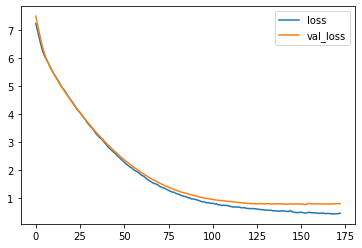

In [88]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [89]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [90]:
predictions = model.predict(X_valid)

8/8 [==============================] - 0s 1ms/step


In [91]:
def floor_mod(array):
    floor = np.floor(array+0.5).astype('int64')
    for i in range(0, len(array)):
        if floor[i][0] == 3:
            floor[i][0] = 2
        elif floor[i][0] in [0,1,2]:
            continue
        else:
            floor[i][0] = 0
    return floor

In [92]:
predictions = floor_mod(predictions)

In [93]:
matrix = confusion_matrix(y_true=y_valid, y_pred=predictions )

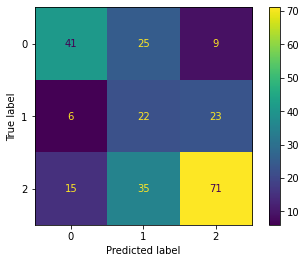

In [94]:
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [95]:
print(classification_report(y_true=y_valid, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.66      0.55      0.60        75
           1       0.27      0.43      0.33        51
           2       0.69      0.59      0.63       121

    accuracy                           0.54       247
   macro avg       0.54      0.52      0.52       247
weighted avg       0.59      0.54      0.56       247



In [96]:
predictions_2 = model.predict(X_test_scaled)

26/26 [==============================] - 0s 2ms/step


In [97]:
predictions_2 = floor_mod(predictions_2)

In [98]:
predictions_2.shape

(824, 1)

In [99]:
outcome_NN = le.inverse_transform(predictions_2.reshape(824,))

In [100]:
results_NN = pd.DataFrame(index=test.id, data=outcome_NN, columns=['outcome'])

In [102]:
results_NN.value_counts()

outcome   
lived         310
euthanized    291
died          223
dtype: int64

# Model Random Forrest #

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [104]:
RFmodel = RandomForestClassifier()

In [105]:
param_grid={'n_estimators':[100,200,150,300,400,500],
           'criterion':['gini', 'entropy'],
           'max_features':['log2','sqrt']}

In [106]:
grid_model = GridSearchCV(estimator=RFmodel,
                          param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         verbose=1)

In [107]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 200, 150, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [108]:
grid_model.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}

In [109]:
RFmodel=RandomForestClassifier(n_estimators=200, max_features='sqrt',criterion='gini')
#RFmodel=RandomForestClassifier(n_estimators=50, max_features='sqrt',criterion='entropy', class_weight='balanced')
RFmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [110]:
#prediction_RF = grid_model.predict(X_valid)
prediction_RF = RFmodel.predict(X_valid)

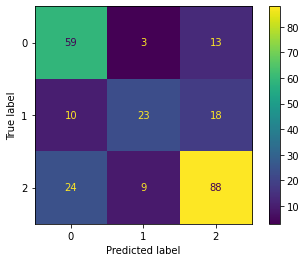

In [111]:
matrix = confusion_matrix(y_true=y_valid, y_pred=prediction_RF )
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [112]:
print(classification_report(y_true=y_valid, y_pred=prediction_RF))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70        75
           1       0.66      0.45      0.53        51
           2       0.74      0.73      0.73       121

    accuracy                           0.69       247
   macro avg       0.68      0.65      0.66       247
weighted avg       0.69      0.69      0.68       247



In [113]:
final_RFmodel=RandomForestClassifier(n_estimators=200, max_features='sqrt',criterion='gini')
final_RFmodel.fit(X, y)

RandomForestClassifier(n_estimators=200)

In [114]:
prediction_RF_result = final_RFmodel.predict(X_test)

In [116]:
outcome = le.inverse_transform(prediction_RF_result.reshape(824,))
results_RF = pd.DataFrame(index=test.id, data=outcome, columns=['outcome'])
results_RF.value_counts()

outcome   
lived         375
died          327
euthanized    122
dtype: int64

# Model KNN #

In [117]:
KNNmodel = KNeighborsClassifier()

In [118]:
param_grid={'n_neighbors':[10, 50,100,200,150],
           'algorithm':['auto', 'ball_tree', 'kd_tree'],
           'weights':['uniform', 'distance']}

In [119]:
grid_model_KNN = GridSearchCV(estimator=KNNmodel,
                          param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         verbose=1)

In [120]:
grid_model_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [10, 50, 100, 200, 150],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=1)

In [121]:
grid_model_KNN.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [122]:
prediction_KNN = grid_model_KNN.predict(X_valid)

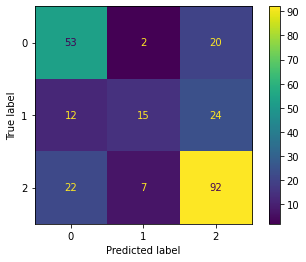

In [123]:
matrix = confusion_matrix(y_true=y_valid, y_pred=prediction_KNN )
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [124]:
print(classification_report(y_true=y_valid, y_pred=prediction_KNN))

              precision    recall  f1-score   support

           0       0.61      0.71      0.65        75
           1       0.62      0.29      0.40        51
           2       0.68      0.76      0.72       121

    accuracy                           0.65       247
   macro avg       0.64      0.59      0.59       247
weighted avg       0.65      0.65      0.63       247



In [125]:
prediction_KNN_result = grid_model_KNN.predict(X_test_scaled)

In [126]:
outcome = le.inverse_transform(prediction_KNN_result.reshape(824,))
results = pd.DataFrame(index=test.id, data=outcome, columns=['outcome'])
results.value_counts()

outcome   
lived         405
died          322
euthanized     97
dtype: int64

# Model Gradient Boosting #

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
GBmodel = GradientBoostingClassifier()

In [129]:
param_grid={'n_estimators':[10,100,200,150,300,400],
           'criterion':['friedman_mse', 'squared_error'],
           'max_features':['log2','sqrt'],
           'learning_rate':[0.3,1.0,1.5]}

In [130]:
grid_model_GB = GridSearchCV(estimator=GBmodel,
                          param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         verbose=1)

In [131]:
grid_model_GB.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.3, 1.0, 1.5],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [10, 100, 200, 150, 300, 400]},
             scoring='neg_mean_squared_error', verbose=1)

In [132]:
grid_model_GB.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'max_features': 'log2',
 'n_estimators': 10}

In [133]:
prediction_GB = grid_model_GB.predict(X_valid)

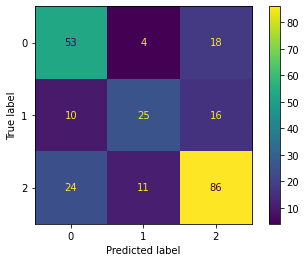

In [134]:
matrix = confusion_matrix(y_true=y_valid, y_pred=prediction_GB )
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [135]:
print(classification_report(y_true=y_valid, y_pred=prediction_GB))

              precision    recall  f1-score   support

           0       0.61      0.71      0.65        75
           1       0.62      0.49      0.55        51
           2       0.72      0.71      0.71       121

    accuracy                           0.66       247
   macro avg       0.65      0.64      0.64       247
weighted avg       0.67      0.66      0.66       247



In [136]:
prediction_GB_result = grid_model_GB.predict(X_test_scaled)

In [137]:
outcome = le.inverse_transform(prediction_GB_result.reshape(824,))
results = pd.DataFrame(index=test.id, data=outcome, columns=['outcome'])
results.value_counts()

outcome   
lived         370
died          331
euthanized    123
dtype: int64

# Model XGB #

In [138]:
from xgboost import XGBClassifier

XBGmodel = XGBClassifier()

In [139]:
param_grid={'n_estimators':[10,100,200,150,300,400],
           'n_jobs':[2,4,6],
           'learning_rate':[0.3,1.0,1.5]}

In [140]:
grid_model_XBG = GridSearchCV(estimator=XBGmodel,
                          param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         verbose=1)

In [141]:
grid_model_XBG.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.3, 1.0, 1.5],
                         'n_estimators': [10, 100, 200, 150, 300, 400],
                         'n_jobs': [2, 4, 6]},
             scoring='neg_mean_squared_error', verbose=1)

In [142]:
grid_model_XBG.best_params_

{'learning_rate': 0.3, 'n_estimators': 10, 'n_jobs': 2}

In [143]:
XBGmodel=XGBClassifier(n_estimators=100, learning_rate=0.3, n_jobs=2)
XBGmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=2, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [144]:
prediction_XBG = grid_model_XBG.predict(X_valid)

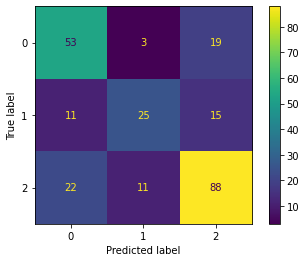

In [145]:
matrix = confusion_matrix(y_true=y_valid, y_pred=prediction_XBG )
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [146]:
print(classification_report(y_true=y_valid, y_pred=prediction_XBG))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66        75
           1       0.64      0.49      0.56        51
           2       0.72      0.73      0.72       121

    accuracy                           0.67       247
   macro avg       0.66      0.64      0.65       247
weighted avg       0.67      0.67      0.67       247



In [147]:
final_XBGmodel=XGBClassifier(n_estimators=100, learning_rate=0.3, n_jobs=2)
final_XBGmodel.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=2, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [148]:
prediction_XBG_result = final_XBGmodel.predict(X_test_scaled)

In [149]:
outcome = le.inverse_transform(prediction_XBG_result.reshape(824,))
results_XBG = pd.DataFrame(index=test.id, data=outcome, columns=['outcome'])
results_XBG.value_counts()

outcome   
lived         709
died           91
euthanized     24
dtype: int64

# Final file for submission #

In [150]:
results_XBG.to_csv('submission.csv')